In [2]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/Intermediate_Regression_with_statsmodels_in_Python/datasets/'
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
from statsmodels.formula.api import ols

In [3]:
# exercise 01

"""
Interactive 3D scatter plot

Since computer screens and paper are both two-dimensional objects, most plots are best suited to visualizing two variables at once. For the case of three continuous variables, you can draw a 3D scatter plot, but perspective problems usually make it difficult to interpret. This can partially be solved by making the 3D plot interactive, so you can view the plot from different angles.

The 3D scatter shown has n_convenience on the x-axis, sqrt_dist_to_mrt_m on the y-axis, and price_twd_msq on the z-axis — you can interact with it by dragging and zooming. The points are colored according to price_twd_msq.

Which of the following statements is NOT correct?
"""

# Instructions

"""
The house price decreases when the number of convenience store decreases.

There is one house with an exceptionally high price for its amount of nearby convenience stores.

The farther the closest MRT station is, the lower the house price.

There tends to be a positive relationship between the number of convenience stores and the distance to the closest MRT station. (Answer)
"""

# solution



#----------------------------------#

# Conclusion

"""
Three cheers for plotting three variables! 3D scatter plots are usually a pain to easily interpret due to problems with perspective. It may be possible to look at the plot interactively, but a better alternative for displaying a third variable involves using colors.
"""

'\nThree cheers for plotting three variables! 3D scatter plots are usually a pain to easily interpret due to problems with perspective. It may be possible to look at the plot interactively, but a better alternative for displaying a third variable involves using colors.\n'

In [4]:
# load datasets
data_path = path_data + 'taiwan_real_estate2.csv'

taiwan_real_estate = pd.read_csv(data_path)

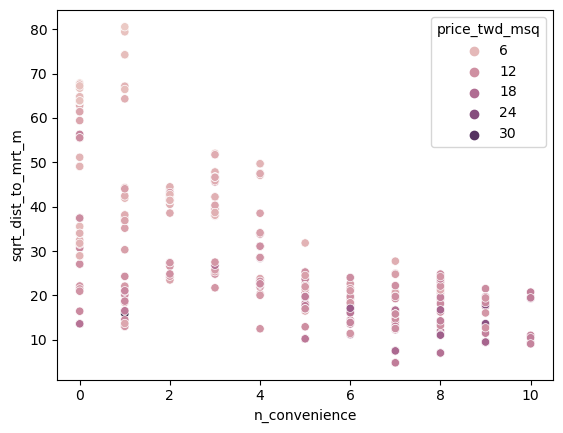

'\nScholarly scatter plotting! Using color for the numeric response variable is a great alternative for 3D scatter plots. The plot suggests that prices are higher when more convenience stores are nearby or when the distance to the nearest MRT station is short. Additionally, there tend to be more convenience stores when the nearest MRT station is close.\n'

In [5]:
# exercise 02

"""
Visualizing three numeric variables

There are also some "flat" alternatives to 3D plots that provide easier interpretation, though they require a little thinking about to make. A good approach is plotting the two numeric explanatory variables on the x- and y-axis of a scatter plot, and coloring the points according to the response variable.

taiwan_real_estate is available.
"""

# Instructions

"""

    Calculate the square-root of the distance to the nearest MRT stop as sqrt_dist_to_mrt_m.
    With the taiwan_real_estate dataset, draw a scatter plot of sqrt_dist_to_mrt_m versus the number of nearby convenience stores, colored by house price.

"""

# solution

# Transform dist_to_mrt_m to sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate['dist_to_mrt_m'])

# Draw a scatter plot of sqrt_dist_to_mrt_m vs. n_convenience colored by price_twd_msq
sns.scatterplot(x = 'n_convenience', y = 'sqrt_dist_to_mrt_m',data = taiwan_real_estate, hue = 'price_twd_msq' )

# Show the plot
plt.show()

#----------------------------------#

# Conclusion

"""
Scholarly scatter plotting! Using color for the numeric response variable is a great alternative for 3D scatter plots. The plot suggests that prices are higher when more convenience stores are nearby or when the distance to the nearest MRT station is short. Additionally, there tend to be more convenience stores when the nearest MRT station is close.
"""

In [6]:
# exercise 03

"""
Modeling two numeric explanatory variables

You already saw how to make a model and predictions with a numeric and a categorical explanatory variable. The code for modeling and predicting with two numeric explanatory variables is the same, other than a slight difference in how to specify the explanatory variables to make predictions against.

Here you'll model and predict the house prices against the number of nearby convenience stores and the square-root of the distance to the nearest MRT station.

taiwan_real_estate is available with the square-root transformed variable sqrt_dist_to_mrt_m. itertools.product is also loaded.
"""

# Instructions

"""
Fit a linear regression of house price versus the number of convenience stores and the square-root of the distance to the nearest MRT stations, without an interaction, using the taiwan_real_estate dataset.
---

    Create a DataFrame explanatory_data of explanatory variables with number of convenience stores from 0 to 10 and the distance to the nearest MRT station as a sequence from 0 to 80 in steps of 10. Name the columns "n_convenience" and "sqrt_dist_to_mrt_m".
    Add a column of predictions (price_twd_msq) to explanatory_data using mdl_price_vs_conv_dist and explanatory_data. Assign to prediction_data.

"""

# solution

# Fit linear regression of price vs. no. of conv. stores and sqrt dist. to nearest MRT, no interaction
mdl_price_vs_conv_dist = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m", data = taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_conv_dist.params)

#----------------------------------#

# Fit linear regression of price vs. no. of conv. stores and sqrt dist. to nearest MRT, no interaction
mdl_price_vs_conv_dist = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0,11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0,81, 10)

# Create p as all combinations of values of n_convenience and sqrt_dist_to_mrt_m
p = product(n_convenience, sqrt_dist_to_mrt_m)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns = ['n_convenience','sqrt_dist_to_mrt_m'])

# Add column of predictions
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_conv_dist.predict(explanatory_data))

# See the result  
print(prediction_data)


#----------------------------------#

# Conclusion

"""
Nice numeric modeling! The modeling and prediction flow for two numeric variables is just as it was for the previous case that included a categorical variable. statsmodels automatically handles this different scenario. Now let's plot these predictions and see how they match with the actual data points.
"""

Intercept             15.103790
n_convenience          0.214221
sqrt_dist_to_mrt_m    -0.157300
dtype: float64
    n_convenience  sqrt_dist_to_mrt_m  price_twd_msq
0               0                   0      15.103790
1               0                  10      13.530787
2               0                  20      11.957784
3               0                  30      10.384781
4               0                  40       8.811778
..            ...                 ...            ...
94             10                  40      10.953984
95             10                  50       9.380981
96             10                  60       7.807978
97             10                  70       6.234975
98             10                  80       4.661972

[99 rows x 3 columns]


"\nNice numeric modeling! The modeling and prediction flow for two numeric variables is just as it was for the previous case that included a categorical variable. statsmodels automatically handles this different scenario. Now let's plot these predictions and see how they match with the actual data points.\n"

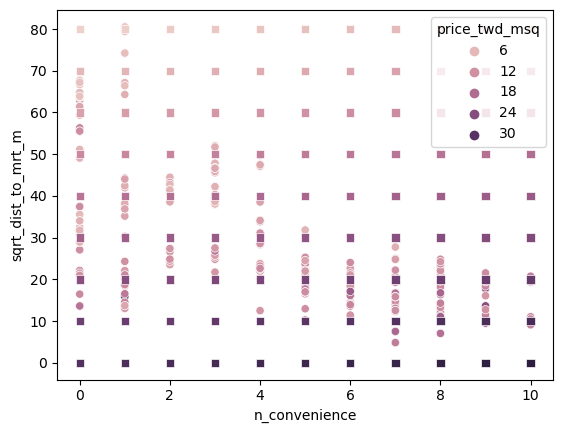

'\nScintillating scatter plotting! Plotting a colored grid of predictions can give you a general idea of how your model performs. The prediction grid confirms that your model is a good fit: prices are higher when more convenience stores are nearby or when the distance to the nearest MRT station is short.\n'

In [7]:
# exercise 04

"""
Visualizing two numeric explanatory variables

The code for visualizing two numeric explanatory variables is the same as you've seen before: create a layer of the actual data points, and add a layer of the prediction points to see how they match. In the case of two numeric explanatory variables, the prediction point layer will look like a grid.

taiwan_real_estate and prediction_data are available with the square-root transformed variable sqrt_dist_to_mrt_m.
"""

# Instructions

"""

    Using taiwan_real_estate, create a scatter plot of sqrt_dist_to_mrt_m versus n_convenience, colored by price_twd_msq.
    Create an additional scatter plot of prediction_data, without a legend, and with marker set to "s" (for squares).

"""

# solution

# Create scatter plot of taiwan_real_estate
sns.scatterplot(x = 'n_convenience', y = 'sqrt_dist_to_mrt_m', data = taiwan_real_estate, hue = 'price_twd_msq')

# Create scatter plot of prediction_data without legend
sns.scatterplot(x = 'n_convenience', y = 'sqrt_dist_to_mrt_m', data = prediction_data, marker = 's', hue = 'price_twd_msq', legend = False)

# Show the plot
plt.show()

#----------------------------------#

# Conclusion

"""
Scintillating scatter plotting! Plotting a colored grid of predictions can give you a general idea of how your model performs. The prediction grid confirms that your model is a good fit: prices are higher when more convenience stores are nearby or when the distance to the nearest MRT station is short.
"""

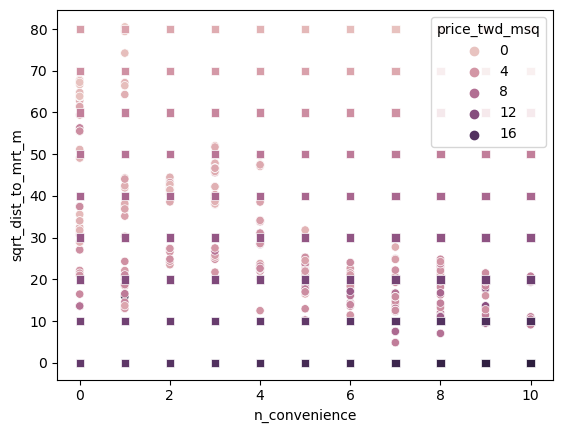

'\nInsightful interaction inclusion! Although the predictions from the model are different now that the interaction is included, the code to create them is the same. The resulting prediction grid is not much different from the model without an interaction.\n'

In [8]:
# exercise 05

"""
Including an interaction

Just as in the case with one numeric and one categorical explanatory variable, it is possible for numeric explanatory variables to interact. With this model structure, you'll get a third slope coefficient: one for each explanatory variable and one for the interaction.

Here, you'll run, predict, and plot the same model as in the previous exercise, but this time including an interaction between the explanatory variables.
"""

# Instructions

"""

    Change the name of the model to mdl_price_vs_conv_dist_inter.
    Adapt the rest of the code from the previous exercise to include an interaction.

"""

# solution

# Convert to mdl_price_vs_conv_dist_inter
mdl_price_vs_conv_dist_inter = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + n_convenience:sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use mdl_price_vs_conv_dist_inter to make predictions
n_convenience = np.arange(0, 11)
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)
p = product(n_convenience, sqrt_dist_to_mrt_m)
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist_inter.predict(explanatory_data))

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=taiwan_real_estate, hue="price_twd_msq", legend=False)

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=prediction_data, hue="price_twd_msq", marker="s")

plt.show()

#----------------------------------#

# Conclusion

"""
Insightful interaction inclusion! Although the predictions from the model are different now that the interaction is included, the code to create them is the same. The resulting prediction grid is not much different from the model without an interaction.
"""

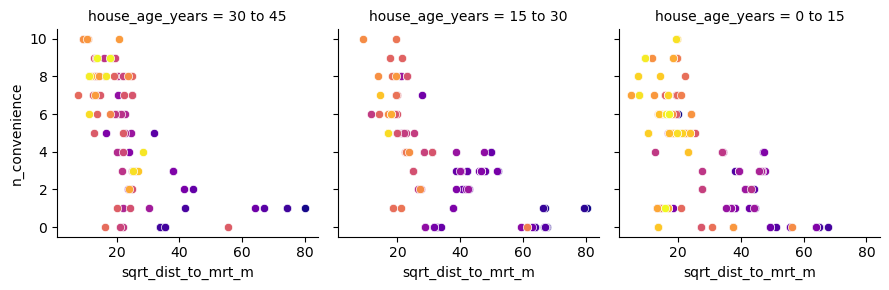

'\nSublime scatter plotting! The plot shows the same as before: house price increases with shorter distances to the nearest MRT station, and increases with the number of nearby convenience stores. Faceting by house age suggests that this effect is similar for all house age groups. As you add more variables, it becomes increasingly challenging to create an easily interpretable plot.\n'

In [9]:
# exercise 06

"""
Visualizing many variables

As you begin to consider more variables, plotting them all at the same time becomes increasingly difficult. In addition to using x and y scales for two numeric variables, you can use color for a third numeric variable, and you can use faceting for categorical variables. And that's about your limit before the plots become too difficult to interpret. There are some specialist plot types like correlation heatmaps and parallel coordinates plots that will handle more variables, but they give you much less information about each variable, and they aren't great for visualizing model predictions.

Here you'll push the limits of the scatter plot by showing the house price, the distance to the MRT station, the number of nearby convenience stores, and the house age, all together in one plot.

taiwan_real_estate is available.
"""

# Instructions

"""

    Create a facet grid for each house_age_years in taiwan_real_estate.
    Using the taiwan_real_estate dataset, draw a scatter plot of n_convenience versus sqrt_dist_to_mrt_m, colored by price_twd_msq.

"""

# solution

# Prepare the grid using taiwan_real_estate, for each house age category, colored by price_twd_msq
grid = sns.FacetGrid(data=taiwan_real_estate,
            col='house_age_years',
            hue='price_twd_msq',
            palette="plasma")

# Plot the scatterplots with sqrt_dist_to_mrt_m on the x-axis and n_convenience on the y-axis
grid.map(sns.scatterplot,
         'sqrt_dist_to_mrt_m',
         'n_convenience')

# Show the plot (brighter colors mean higher prices)
plt.show()

#----------------------------------#

# Conclusion

"""
Sublime scatter plotting! The plot shows the same as before: house price increases with shorter distances to the nearest MRT station, and increases with the number of nearby convenience stores. Faceting by house age suggests that this effect is similar for all house age groups. As you add more variables, it becomes increasingly challenging to create an easily interpretable plot.
"""

In [10]:
# exercise 07

"""
Different levels of interaction

Once you have three explanatory variables, the number of options for specifying interactions increases. You can specify no interactions. You can specify 2-way interactions, which gives you model coefficients for each pair of variables. The third option is to specify all the interactions, which means the three 2-way interactions and the interaction between all three explanatory variables.

As the number of explanatory variables increases further, the number of interaction possibilities rapidly increases.

taiwan_real_estate is available.
"""

# Instructions

"""

    Fit a linear regression of house price versus n_convenience, sqrt_dist_to_mrt_m, and house_age_years. Don't include a global intercept, and don't include any interactions.

    Fit a linear regression of house price versus n_convenience, sqrt_dist_to_mrt_m, and house_age_years. Don't include a global intercept, but do include 2-way and 3-way interactions between the explanatory variables.

    Fit a linear regression of house price versus n_convenience, sqrt_dist_to_mrt_m, and house_age_years. Don't include a global intercept, but do include 2-way (not 3-way) interactions between the explanatory variables.

"""

# solution

# Model price vs. no. of conv. stores, sqrt dist. to MRT station & house age, no global intercept, no interactions
mdl_price_vs_all_no_inter = ols('price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + house_age_years + 0', data = taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_no_inter.params)

#----------------------------------#

# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 3-way interactions
mdl_price_vs_all_3_way_inter = ols("price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m * house_age_years + 0", data = taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_3_way_inter.params)

#----------------------------------#

# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 2-way interactions
mdl_price_vs_all_2_way_inter = ols("price_twd_msq ~ (n_convenience + sqrt_dist_to_mrt_m + house_age_years) ** 2 + 0", data = taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_2_way_inter.params)

#----------------------------------#

# Conclusion

"""
Magnificent model fitting! The formula syntax is flexible enough to provide precise control over which interactions are specified.
"""

house_age_years[0 to 15]     15.474464
house_age_years[15 to 30]    14.130059
house_age_years[30 to 45]    13.765494
n_convenience                 0.257666
sqrt_dist_to_mrt_m           -0.148102
dtype: float64
house_age_years[0 to 15]                                        16.046849
house_age_years[15 to 30]                                       13.760066
house_age_years[30 to 45]                                       12.088773
n_convenience                                                    0.374982
n_convenience:house_age_years[T.15 to 30]                        0.078370
n_convenience:house_age_years[T.30 to 45]                        0.066720
sqrt_dist_to_mrt_m                                              -0.162944
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]                   0.036618
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]                   0.061281
n_convenience:sqrt_dist_to_mrt_m                                -0.008393
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T

'\nMagnificent model fitting! The formula syntax is flexible enough to provide precise control over which interactions are specified.\n'

In [11]:
# exercise 08

"""
Predicting again

You've followed the prediction workflow several times now with different combinations of explanatory variables. Time to try it once more on the model with three explanatory variables. Here, you'll use the model with 3-way interactions, though the code is the same when using any of the three models from the previous exercise.

taiwan_real_estate and mdl_price_vs_all_3_way_inter are available. itertools.product is loaded.
"""

# Instructions

"""
Create explanatory_data, formed from combinations of the following variables, in this order:

    n_convenience should take the numbers zero to ten.
    sqrt_dist_to_mrt_m should take a sequence from zero to eighty in steps of ten.
    house_age_years should take the unique values of the house_age_years column of taiwan_real_estate.
---

    Add a column to the explanatory_data, assigning to prediction_data.
    The column should be named after the response variable, and contain predictions made using mdl_price_vs_all_3_way_inter and explanatory_data.

"""

# solution

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0,11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0,81,10)

# Create house_age_years with unique values
house_age_years = taiwan_real_estate['house_age_years'].unique()

# Create p as all combinations of n_convenience, sqrt_dist_to_mrt_m, and house_age_years, in that order
p = product(n_convenience,sqrt_dist_to_mrt_m,house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns = ['n_convenience', 'sqrt_dist_to_mrt_m', 'house_age_years'])

# See the result
print(explanatory_data)

#----------------------------------#

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create house_age_years with unique values
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of n_convenience, sqrt_dist_to_mrt_m, and house_age_years, in that order
p = product(n_convenience, sqrt_dist_to_mrt_m, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience",
                                            "sqrt_dist_to_mrt_m",
                                            "house_age_years"])

# Add column of predictions
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_all_3_way_inter.predict(explanatory_data))

# See the result
print(prediction_data)

#----------------------------------#

# Conclusion

"""
Premier predicting! Notice how rapidly the dimensions of the prediction data increase when you are adding more and more variables.
"""

     n_convenience  sqrt_dist_to_mrt_m house_age_years
0                0                   0        30 to 45
1                0                   0        15 to 30
2                0                   0         0 to 15
3                0                  10        30 to 45
4                0                  10        15 to 30
..             ...                 ...             ...
292             10                  70        15 to 30
293             10                  70         0 to 15
294             10                  80        30 to 45
295             10                  80        15 to 30
296             10                  80         0 to 15

[297 rows x 3 columns]
     n_convenience  sqrt_dist_to_mrt_m house_age_years  price_twd_msq
0                0                   0        30 to 45      12.088773
1                0                   0        15 to 30      13.760066
2                0                   0         0 to 15      16.046849
3                0                  

'\nPremier predicting! Notice how rapidly the dimensions of the prediction data increase when you are adding more and more variables.\n'

In [12]:
# exercise 09

"""
The sum of squares

In order to choose the "best" line to fit the data, regression models need to optimize some metric. For linear regression, this metric is called the sum of squares.

In the dashboard, try setting different values of the intercept and slope coefficients. In the plot, the solid black line has the intercept and slope you specified. The dotted blue line has the intercept and slope calculated by a linear regression on the dataset.

How does linear regression try to optimize the sum of squares metric?
"""

# Instructions

"""
Linear regression makes the sum of the squares of the differences between the actual responses and the predicted responses zero.

Linear regression makes the sum of the squares of the differences between the actual responses and the predicted responses infinite.

Linear regression maximizes the sum of the squares of the differences between the actual responses and the predicted responses.

Linear regression minimizes the sum of the squares of the differences between the actual responses and the predicted responses. (Answer)
"""

# solution



#----------------------------------#

# Conclusion

"""
Magic minimization! Sum of squares is a measure of how far the predicted responses are from the actual responses, so a smaller number is better.
"""

'\nMagic minimization! Sum of squares is a measure of how far the predicted responses are from the actual responses, so a smaller number is better.\n'

In [15]:
# create x and y actual

x_actual = taiwan_real_estate['n_convenience']
y_actual = taiwan_real_estate['price_twd_msq']

# import minimize

from scipy.optimize import minimize

In [16]:
# exercise 10

"""
Linear regression algorithm

To truly understand linear regression, it is helpful to know how the algorithm works. The code for ols() is hundreds of lines because it has to work with any formula and any dataset. However, in the case of simple linear regression for a single dataset, you can implement a linear regression algorithm in just a few lines of code.

The workflow is:

    First, write a function to calculate the sum of squares using this general syntax:

def function_name(args):
  # some calculations with the args
  return outcome

    Second, use scipy's minimize function find the coefficients that minimize this function.

The explanatory values (the n_convenience column of taiwan_real_estate) are available as x_actual. The response values (the price_twd_msq column of taiwan_real_estate) are available as y_actual.

minimize() is also loaded.
"""

# Instructions

"""
Complete the function body.

    Unpack coeffs to intercept and slope, respectively.
    Calculate the predicted y-values as the intercept plus the slope times the actual x-values.
    Calculate the differences between actual and predicted y-values.
    Calculate the sum of squares: square the differences in y-values and take the sum.
    Return the sum of squares.

---
Minimize the sum of squares metric.

    Use calc_sum_of_squares as the function to minimize.
    Pass [0, 0] as the initial intercept and slope values for the minimize() function.
    Compare the output with the ols() call.

"""

# solution

# Complete the function
def calc_sum_of_squares(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = intercept + slope * x_actual
    # Calculate differences between y_pred and y_actual
    y_diff = y_pred - y_actual
    # Calculate sum of squares
    sum_sq = np.sum(y_diff ** 2)
    # Return sum of squares
    return sum_sq
  
# Test the function with intercept 10 and slope 1
print(calc_sum_of_squares([10, 1]))

#----------------------------------#

# Complete the function
def calc_sum_of_squares(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = intercept + slope * x_actual
    # Calculate differences between y_actual and y_pred
    y_diff = y_pred - y_actual
    # Calculate sum of squares
    sum_sq = np.sum(y_diff ** 2)
    # Return sum of squares
    return sum_sq

# Call minimize on calc_sum_of_squares  
print(minimize(fun=calc_sum_of_squares,
               x0=[0,0]))

# Compare the output with the ols() call.
print(ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit().params)
  

#----------------------------------#

# Conclusion

"""
Outstanding optimization! The results you got here with just a few lines of code are identical to the finely-tuned results from ols(). All you needed was a function to calculate the sum of squares metric, and the minimize() function worked its magic to find where this function had its minimum value. On to the last chapter!
"""

7667.734402786995
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4717.68623992569
        x: [ 8.224e+00  7.981e-01]
      nit: 5
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 3.547e-03 -5.713e-04]
            [-5.713e-04  1.395e-04]]
     nfev: 21
     njev: 7
Intercept        8.224237
n_convenience    0.798080
dtype: float64


'\nOutstanding optimization! The results you got here with just a few lines of code are identical to the finely-tuned results from ols(). All you needed was a function to calculate the sum of squares metric, and the minimize() function worked its magic to find where this function had its minimum value. On to the last chapter!\n'

In [ ]:
# exercise 11

"""

"""

# Instructions

"""

"""

# solution



#----------------------------------#

# Conclusion

"""

"""